In [8]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

import sklearn

In [9]:
data = pd.read_csv("data/derived_accused_cases_trials.csv")
data.head(3)

,AccusedRef,AccusedSystemId,AccusedID,FirstName,LastName,M_Firstname,M_Surname,Alias,Patronymic,DesTitle,...,Exec_county,Exec_burgh,Exec_NGR_Letters,Exec_NGR_Easting,Exec_NGR_Northing,PostTrialNotes,Createdby_y,Createdate_y,Lastupdatedby_y,Lastupdatedon_y
0,A/EGD/10,EGD,10.0,Mareon,Quheitt,Marion,White,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,jhm,08/07/02 15:23:55,LEM,10/28/02 13:06:53
1,A/EGD/100,EGD,100.0,Thom,Cockburn,Thomas,Cockburn,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,LEM,07/24/02 16:01:21,LEM,07/24/02 16:01:23
2,A/EGD/1000,EGD,1000.0,Christian,Aitkenhead,Christine,Aikenhead,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,LEM,07/18/01 16:13:27,jhm,10/01/02 10:48:24


In [10]:
data.shape

(3795, 205)

In [11]:
# Features we are interested in 
list_of_trial_features = ['Execution', 'Noreftocentral', 'Localwithcrep', 'Circuit', 'Cjtorder', 'Defence', 'High_status', 
                          'Male_accusers', 'Female_accusers', 'Confrontingsuspects', 'ActionDropped', 'Fled', 'Arrest', 
                          'Watching', 'TrialType']

list_of_accused_features = ['AccusedRef', 'M_Firstname', 'M_Surname', 'Alias', 'Patronymic', 'DesTitle', 'Sex', 'Age', 
                            'Res_settlement', 'Res_parish', 'Res_presbytery',  'Res_county', 'Res_burgh', 'Ethnic_origin', 
                            'MaritalStatus', 'SocioecStatus', 'Occupation', 'Notes']

list_of_cases_features = ['CaseRef', 'CaseStart_date', 'CaseStart_date_as_date', 'Case_date', 'Case_date_as_date', 'Age_at_case', 
                          'CaseCommonName', 'Complaint', 'Correspondence', 'Chronicle', 'Suspects_text', 'Familiars', 'Shape-Changing', 
                          'Dreams/Visions', 'UnorthodoxReligiousPractice', 'SympatheticMagic', 'Ridingdead', 'FolkNotes', 
                          'HumanIllness', 'HumanDeath', 'AnimalIllness', 'AnimalDeath', 'FemaleInfertility', 'MaleImpotence', 
                          'AggravatingDisease', 'TransferringDisease', 'LayingOn', 'Removalbewitchment', 'Quarreling', 'Cursing', 
                          'Poisoning', 'RecHealer', 'HealingHumans', 'HealingAnimals', 'Midwifery', 'DiseaseNotes', 'PropertyDamage', 
                          'WeatherModification', 'OtherMaleficiaNotes', 'OtherChargesNotes', 'ClaimedBewitched', 'ClaimedPossessed', 
                          'AdmitLesserCharge', 'ClaimedNaturalCauses', 'Nodefence', 'DefenseNotes', 'CaseNotes', 'PoliticalMotive_s', 
                          'PropertyMotive_p', 'PropertyMotive_s', 'RefusedCharity_p', 'RefusedCharity_s', 'Treason_p', 'Treason_s', 
                          'Other_p', 'Other_s', 'OtherText', 'NotEnoughInfo_p', 'NotEnoughInfo_s', 'WhiteMagic_p', 'WhiteMagic_s', 
                          'Charnotes', 'DemonicPact', 'DevilNotes', 'WitchesMeeting', 'MeetingName', 'DevilPresent', 'Maleficium', 
                          'CommunalSex', 'DevilWorship', 'FoodAndDrink', 'Dancing', 'Singing', 'SingingText', 'OtherPractices', 
                          'MeetingNotes', 'Elphane/Fairyland', 'Food/Drink', 'SpecificVerbalFormulae', 'SpecificRitualActs', 
                          'UNorthodoxRelPract_p', 'UNorthodoxRelPract_s', 'Consulting_p', 'Consulting_s', 'Demonic_p', 'Demonic_s', 
                          'Demonic_possess_p', 'Demonic_possess_s', 'Fairies_p', 'Fairies_s', 'Folk_healing_p', 'Folk_healing_s', 
                          'Maleficium_p', 'Maleficium_s', 'Midwifery_p', 'Midwifery_s', 'ImplicatedByAnother_p', 'ImplicatedByAnother_s', 
                          'Neighbhd_dispute_p', 'Neighbhd_dispute_s', 'PoliticalMotive_p']

In [12]:
#Limit data to important features.
all_features = list_of_accused_features + list_of_cases_features + list_of_trial_features
df = data[all_features]

In [13]:
#Drop columns with more than 80% missing values.
percent_non_null = 0.8
df = df.dropna(axis = 1, thresh=df.shape[0]*percent_non_null)
df.head()

,AccusedRef,M_Firstname,M_Surname,Sex,Res_county,CaseRef,Case_date,Case_date_as_date,CaseCommonName,Familiars,...,Defence,High_status,Male_accusers,Female_accusers,Confrontingsuspects,ActionDropped,Fled,Arrest,Watching,TrialType
0,A/EGD/10,Marion,White,Female,Haddington,C/EGD/21,3/4/1661,04/03/61 00:00:00,"Quheitt,Mareon",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,A/EGD/100,Thomas,Cockburn,Male,Haddington,C/EGD/111,1591,06/01/91 00:00:00,"Cockburn,Thom",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,A/EGD/1000,Christine,Aikenhead,Female,Dumfries,C/EGD/1011,6/5/1628,05/06/28 00:00:00,"Aitkenhead,Christian",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,A/EGD/1001,Janet,Ireland,Female,Dumfries,C/EGD/1012,6/5/1628,05/06/28 00:00:00,"Ireland,Janet",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,A/EGD/1002,Agnes,Henderson,Female,Stirling,C/EGD/1013,3/7/1628,07/03/28 00:00:00,"Hendersoun,Agnes",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [7]:
df.shape

(3795, 101)

In [8]:
df.describe(include="all")

,AccusedRef,M_Firstname,M_Surname,Sex,Res_county,CaseRef,Case_date,Case_date_as_date,CaseCommonName,Familiars,...,Defence,High_status,Male_accusers,Female_accusers,Confrontingsuspects,ActionDropped,Fled,Arrest,Watching,TrialType
count,3594,3550,3558,3544,3474,3788,3774,3773,3788,3788.000000,...,3211.000000,3211.000000,3209.000000,3208.000000,3211.000000,3211.000000,3211.00000,3211.000000,3211.000000,3211.000000
unique,3219,159,1168,2,34,3413,1164,1159,3047,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A/EGD/285,Janet,Thomson,Female,Haddington,C/EGD/39,17/4/1662,04/17/62 00:00:00,3 unnamed witches,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,544,66,3030,658,3,93,93,109,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003432,...,0.013080,0.008409,0.418199,0.255923,0.032077,0.012457,0.03052,0.151355,0.006851,2.536593
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058489,...,0.113635,0.091326,2.510500,1.627914,0.176233,0.110932,0.17204,0.358450,0.082502,0.927673
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000


In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [10]:
missing_value_df.sort_values("percent_missing", ascending=False).head(50)

,column_name,percent_missing
Female_accusers,Female_accusers,15.467721
Male_accusers,Male_accusers,15.441370
TrialType,TrialType,15.388669
Noreftocentral,Noreftocentral,15.388669
Localwithcrep,Localwithcrep,15.388669
Circuit,Circuit,15.388669
Cjtorder,Cjtorder,15.388669
Defence,Defence,15.388669
High_status,High_status,15.388669
Confrontingsuspects,Confrontingsuspects,15.388669


In [11]:
df.columns

Index(['AccusedRef', 'M_Firstname', 'M_Surname', 'Sex', 'Res_county',
       'CaseRef', 'Case_date', 'Case_date_as_date', 'CaseCommonName',
       'Familiars',
       ...
       'Defence', 'High_status', 'Male_accusers', 'Female_accusers',
       'Confrontingsuspects', 'ActionDropped', 'Fled', 'Arrest', 'Watching',
       'TrialType'],
      dtype='object', length=101)

In [12]:
df.shape

(3795, 101)

In [13]:
"CommunalSex" in df.columns

True

In [14]:
df.CommunalSex.value_counts()

0.0    3781
1.0       7
Name: CommunalSex, dtype: int64

In [15]:
percent_missing = df.isna().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [16]:
missing_value_df.sort_values("percent_missing", ascending=True).head(50)


,column_name,percent_missing
WhiteMagic_p,WhiteMagic_p,0.184453
DevilWorship,DevilWorship,0.184453
CommunalSex,CommunalSex,0.184453
Maleficium,Maleficium,0.184453
DevilPresent,DevilPresent,0.184453
WitchesMeeting,WitchesMeeting,0.184453
DemonicPact,DemonicPact,0.184453
WhiteMagic_s,WhiteMagic_s,0.184453
FoodAndDrink,FoodAndDrink,0.184453
ImplicatedByAnother_p,ImplicatedByAnother_p,0.184453


In [17]:
df.WhiteMagic_p.value_counts()

0.0    3781
1.0       7
Name: WhiteMagic_p, dtype: int64

In [18]:
df.WhiteMagic_s.value_counts()

0.0    3695
1.0      93
Name: WhiteMagic_s, dtype: int64

In [19]:
"Sex" in df.columns

True

In [20]:
df.Sex.value_counts()

Female    3030
Male       514
Name: Sex, dtype: int64

In [21]:
df.Folk_healing_p.value_counts()

0.0    3740
1.0      48
Name: Folk_healing_p, dtype: int64

In [22]:
df.Folk_healing_s.value_counts()

0.0    3618
1.0     170
Name: Folk_healing_s, dtype: int64

In [23]:
df.Demonic_possess_p.value_counts()

0.0    3730
1.0      58
Name: Demonic_possess_p, dtype: int64

In [24]:
df.Demonic_possess_s.value_counts()

0.0    3701
1.0      87
Name: Demonic_possess_s, dtype: int64

In [25]:
df.UNorthodoxRelPract_p.value_counts()

0.0    3788
Name: UNorthodoxRelPract_p, dtype: int64

In [26]:
df.UNorthodoxRelPract_s.value_counts()

0.0    3677
1.0     111
Name: UNorthodoxRelPract_s, dtype: int64

In [27]:
df.UnorthodoxReligiousPractice.value_counts()

0.0    3677
1.0     111
Name: UnorthodoxReligiousPractice, dtype: int64

In [28]:
df.HealingHumans.value_counts()

0.0    3646
1.0     142
Name: HealingHumans, dtype: int64

In [29]:
df.HealingAnimals.value_counts()

0.0    3726
1.0      62
Name: HealingAnimals, dtype: int64

In [30]:
df.Neighbhd_dispute_p.value_counts()

0.0    3723
1.0      65
Name: Neighbhd_dispute_p, dtype: int64

In [31]:
df.Neighbhd_dispute_s.value_counts()

0.0    3633
1.0     155
Name: Neighbhd_dispute_s, dtype: int64

In [32]:
df.PoliticalMotive_p.value_counts()

0.0    3785
1.0       3
Name: PoliticalMotive_p, dtype: int64

In [33]:
df.PoliticalMotive_s.value_counts()

0.0    3718
1.0      70
Name: PoliticalMotive_s, dtype: int64

In [34]:
df.PropertyMotive_p.value_counts()

0.0    3782
1.0       6
Name: PropertyMotive_p, dtype: int64

In [35]:
df.PropertyMotive_s.value_counts()

0.0    3710
1.0      78
Name: PropertyMotive_s, dtype: int64

In [36]:
df.RefusedCharity_p.value_counts()

0.0    3778
1.0      10
Name: RefusedCharity_p, dtype: int64

In [37]:
df.RefusedCharity_s.value_counts()

0.0    3765
1.0      23
Name: RefusedCharity_s, dtype: int64

In [38]:
df.Treason_p.value_counts()

0.0    3782
1.0       6
Name: Treason_p, dtype: int64

In [39]:
df.Treason_s.value_counts()

0.0    3757
1.0      31
Name: Treason_s, dtype: int64

In [40]:
df.Quarreling.value_counts()

0.0    3616
1.0     172
Name: Quarreling, dtype: int64

In [41]:
df.Cursing.value_counts()

0.0    3623
1.0     165
Name: Cursing, dtype: int64

In [42]:
df.Poisoning.value_counts()

0.0    3765
1.0      23
Name: Poisoning, dtype: int64

In [43]:
df.RecHealer.value_counts()

0.0    3733
1.0      55
Name: RecHealer, dtype: int64

In [44]:
df.Dancing.value_counts()

0.0    3633
1.0     155
Name: Dancing, dtype: int64

In [45]:
df.Singing.value_counts()

0.0    3764
1.0      24
Name: Singing, dtype: int64

In [46]:
df.Midwifery.value_counts()

0.0    3772
1.0      16
Name: Midwifery, dtype: int64

In [92]:
important_features = ['Execution', 'Arrest', 'Fled', 'ActionDropped', 'High_status', 'Male_accusers', 'Female_accusers', 
                      'WhiteMagic_p', 'WhiteMagic_s', 'Folk_healing_p', 'Folk_healing_s', 'Demonic_possess_p', 'Demonic_possess_s', 
                     'UNorthodoxRelPract_p', 'UNorthodoxRelPract_s', 'UnorthodoxReligiousPractice', 'HealingHumans', 'HealingAnimals', 
                     'Neighbhd_dispute_p', 'Neighbhd_dispute_s', 'PoliticalMotive_p', 'PoliticalMotive_s', 'PropertyMotive_p', 'PropertyMotive_s', 
                     'RefusedCharity_p', 'RefusedCharity_s', 'Treason_p', 'Treason_s', 'Quarreling', 'Cursing', 'Poisoning', 'RecHealer', 
                     'Dancing', 'Singing', 'Midwifery']

In [93]:
df_important_features = df[important_features]

In [94]:
# Add the sex column, but changed to 0-1 format
df_sex = pd.get_dummies(df.Sex)
df_important_features = pd.concat((df_sex, df_important_features), axis = 1)

In [95]:
df_important_features = df_important_features.drop(['Male'], axis = 1)
df_important_features = df_important_features.rename(columns={"Female": "Sex"})

In [96]:
important_features.insert(1, "Sex")
df_important_features = df_important_features.reindex(columns = important_features)

In [97]:
df_important_features.Sex.value_counts()

1    3030
0     765
Name: Sex, dtype: int64

In [98]:
df_important_features.corr()

,Execution,Sex,Arrest,Fled,ActionDropped,High_status,Male_accusers,Female_accusers,WhiteMagic_p,WhiteMagic_s,...,RefusedCharity_s,Treason_p,Treason_s,Quarreling,Cursing,Poisoning,RecHealer,Dancing,Singing,Midwifery
Execution,1.000000,0.008680,0.105096,0.013904,-0.020309,0.186037,0.321297,0.308178,-0.012983,0.124861,...,0.048012,0.015946,0.035791,0.196740,0.208852,0.048012,0.205333,0.140284,0.074047,0.066101
Sex,0.008680,1.000000,0.010146,-0.069235,0.017010,-0.036029,-0.015152,0.003145,0.006283,-0.005391,...,0.013835,0.020004,-0.027440,0.090565,0.081380,0.005362,-0.038087,0.027315,0.023512,0.022560
Arrest,0.105096,0.010146,1.000000,-0.004207,0.070086,0.056274,0.092726,0.063019,-0.019740,-0.021120,...,-0.015262,0.001849,0.004149,0.026888,0.011912,-0.015262,0.024615,0.071109,0.054152,0.007137
Fled,0.013904,-0.069235,-0.004207,1.000000,-0.019928,0.043144,0.018771,0.002136,-0.008293,0.012541,...,-0.015071,-0.007677,-0.017231,-0.034170,-0.033095,-0.015071,0.004485,-0.023065,-0.015397,0.038869
ActionDropped,-0.020309,0.017010,0.070086,-0.019928,1.000000,-0.010343,-0.012004,-0.007312,-0.005250,0.014089,...,-0.009540,-0.004860,0.018279,0.048103,0.024730,-0.009540,-0.014827,0.027106,-0.009746,-0.007948
High_status,0.186037,-0.036029,0.056274,0.043144,-0.010343,1.000000,0.476674,0.381732,-0.004304,0.065445,...,0.032622,0.074989,0.061959,0.129568,0.117597,0.032622,0.092987,0.122471,0.071205,0.041920
Male_accusers,0.321297,-0.015152,0.092726,0.018771,-0.012004,0.476674,1.000000,0.817430,-0.007790,0.142171,...,0.112411,0.021527,0.001876,0.399896,0.410085,0.041769,0.239130,0.091536,0.008593,0.074573
Female_accusers,0.308178,0.003145,0.063019,0.002136,-0.007312,0.381732,0.817430,1.000000,-0.007353,0.161175,...,0.126171,0.041951,0.006611,0.402602,0.406449,0.027498,0.252172,0.093696,0.010797,0.078582
WhiteMagic_p,-0.012983,0.006283,-0.019740,-0.008293,-0.005250,-0.004304,-0.007790,-0.007353,1.000000,0.271214,...,-0.003363,-0.001714,-0.003908,-0.009384,-0.009182,-0.003363,-0.005223,-0.008887,-0.003436,-0.002802
WhiteMagic_s,0.124861,-0.005391,-0.021120,0.012541,0.014089,0.065445,0.142171,0.161175,0.271214,1.000000,...,0.031518,0.165268,0.137067,0.186631,0.158370,0.031518,0.237442,0.156677,0.159329,0.121186


In [37]:
def summary(feature):
    #Print out all feature values
    print("The rows of the feature are," , str(feature))
    
    #print value counts
    print('' )
    print("The values are, ",feature.value_counts() )
    print('')
    
    #print most seen value
    mode = max(feature.value_counts())
    print("The most seen value is,", mode )
    print('')
    
    #Get unique values of feature
    output = []
    for x in feature.value_counts():
        if x not in output:
            output.append(x)
    print("The unique value counts are", output)
    
    
summary(df.Case_date)

The rows of the feature are, 0         3/4/1661
1             1591
2         6/5/1628
3         6/5/1628
4         3/7/1628
           ...    
3790     27/4/1697
3791     19/7/1698
3792      7/5/1650
3793     22/4/1650
3794    25/10/1651
Name: Case_date, Length: 3795, dtype: object

The values are,  17/4/1662    93
6/11/1649    46
6/4/1658     44
14/4/1662    42
1662         39
             ..
21/4/1643     1
29/6/1649     1
30/3/1679     1
21/2/1633     1
12/1/1630     1
Name: Case_date, Length: 1164, dtype: int64

The most seen value is, 93

The unique value counts are [93, 46, 44, 42, 39, 38, 36, 31, 28, 27, 26, 24, 23, 21, 20, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [14]:
df.head()

,AccusedRef,M_Firstname,M_Surname,Sex,Res_county,CaseRef,Case_date,Case_date_as_date,CaseCommonName,Familiars,...,Defence,High_status,Male_accusers,Female_accusers,Confrontingsuspects,ActionDropped,Fled,Arrest,Watching,TrialType
0,A/EGD/10,Marion,White,Female,Haddington,C/EGD/21,3/4/1661,04/03/61 00:00:00,"Quheitt,Mareon",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,A/EGD/100,Thomas,Cockburn,Male,Haddington,C/EGD/111,1591,06/01/91 00:00:00,"Cockburn,Thom",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,A/EGD/1000,Christine,Aikenhead,Female,Dumfries,C/EGD/1011,6/5/1628,05/06/28 00:00:00,"Aitkenhead,Christian",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,A/EGD/1001,Janet,Ireland,Female,Dumfries,C/EGD/1012,6/5/1628,05/06/28 00:00:00,"Ireland,Janet",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,A/EGD/1002,Agnes,Henderson,Female,Stirling,C/EGD/1013,3/7/1628,07/03/28 00:00:00,"Hendersoun,Agnes",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [47]:
#Dates of the data
print(df.Case_date.sort_values(ascending=False).dropna())

2486    9/9/1679
2485    9/9/1679
2483    9/9/1679
991     9/9/1658
1549    9/9/1649
          ...   
505     1/1/1662
1879    1/1/1662
1874    1/1/1662
1875    1/1/1662
503     1/1/1662
Name: Case_date, Length: 3774, dtype: object


<AxesSubplot:>

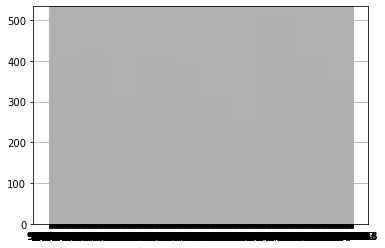

In [54]:
df.Case_date.sort_values(ascending=False).dropna().hist()